# Imports

In [12]:
import torch
import torch.autograd as autograd
from multi_cmd import gda_utils,cgd_utils

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Testing Meta-Matrix Product

<IPython.core.display.Javascript object>


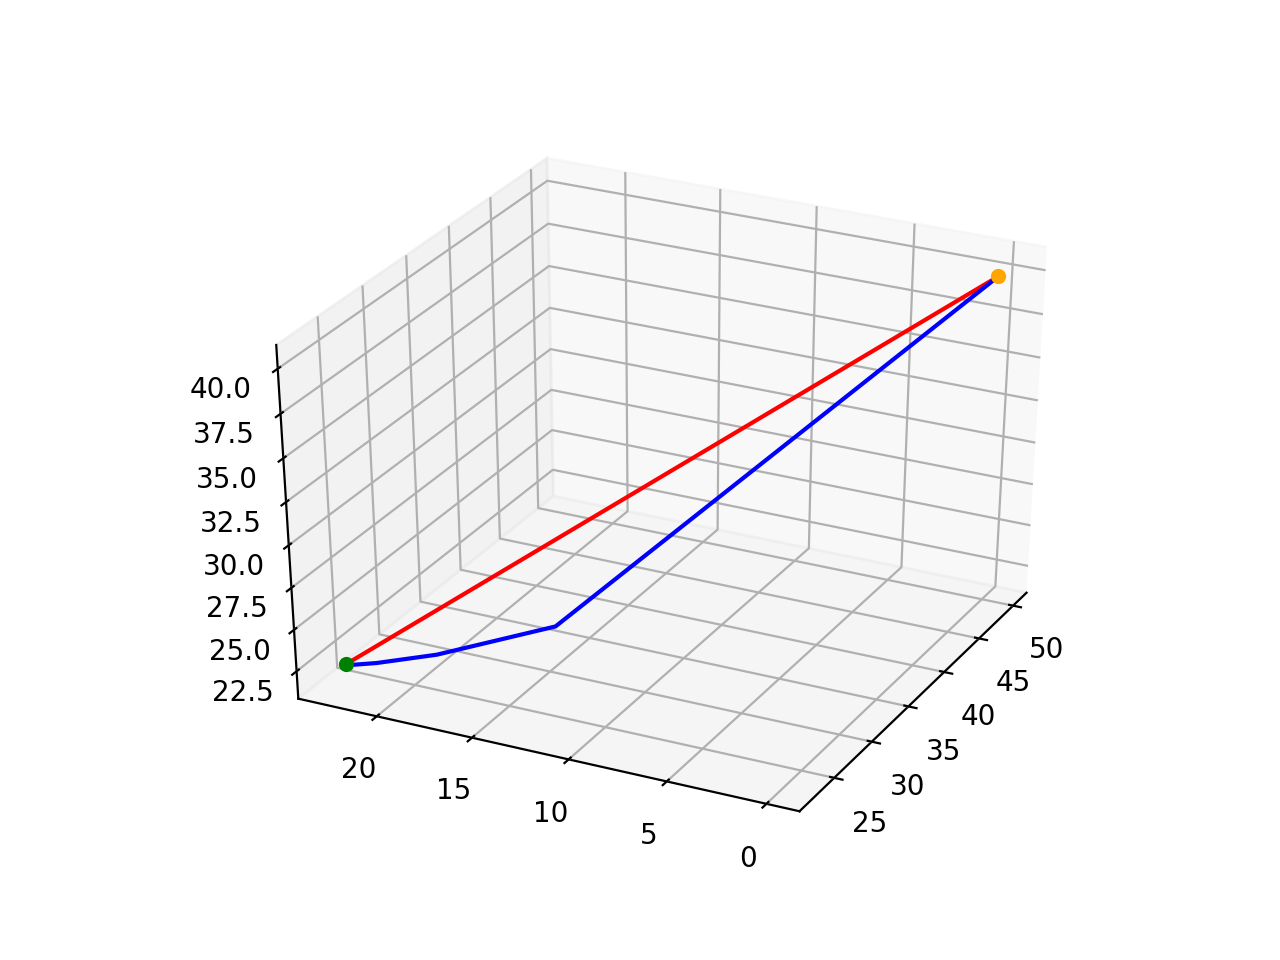

In [42]:
%matplotlib notebook

#==========================================================================
def player_payoffs(quantity_list,
                   market_demand=lambda q: 100 - q,
                   marginal_cost=lambda q: q * 10):

    quantity_tensor = players = torch.stack(quantity_list)

    price = torch.max(market_demand(torch.sum(quantity_tensor)),
                      torch.tensor(0., requires_grad=True))

    payoffs = []
    for i, quantity in enumerate(quantity_tensor):
        # Negative, since CGD minimizes player objectives.
        payoffs.append(- (quantity * price - marginal_cost(quantity)))
        
    return payoffs
#==========================================================================

num_iterations = 100
learning_rates = [0.5, 0.5, 0.5]

#==========================================================================

# Define individual sellers quantities
p1 = torch.tensor([50.], requires_grad=True)
p2 = torch.tensor([0.], requires_grad=True)
p3 = torch.tensor([40.], requires_grad=True)

player_list = [p1, p2, p3]

cgd_trajectory = [[], [], []]

for i in range(num_iterations):
    
    for player, traj_list in zip(player_list, cgd_trajectory):
        traj_list.append(float(player[0]))
    
    payoffs = player_payoffs(player_list)
    updates, _ = cgd_utils.metamatrix_conjugate_gradient(
        payoffs, player_list, lr_list=learning_rates)
    
    for player, update in zip(player_list, updates):
        player.data.add_(update)

#==========================================================================

# Define individual sellers quantities
p1 = torch.tensor([50.], requires_grad=True)
p2 = torch.tensor([0.], requires_grad=True)
p3 = torch.tensor([40.], requires_grad=True)

player_list = [p1, p2, p3]

gda_trajectory = [[], [], []]

for i in range(num_iterations):
    
    for player, traj_list in zip(player_list, gda_trajectory):
        traj_list.append(float(player[0]))
    
    for i, player in enumerate(player_list):
        payoffs = player_payoffs(player_list)
        
        update = gda_utils.compute_update(payoffs[i], player, lr=learning_rates[i])
        player.data.add_(update)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(*cgd_trajectory, 'red')
ax.plot3D(*gda_trajectory, 'blue')
ax.scatter3D([22.5], [22.5], [22.5], c=['Green']);
ax.scatter3D([50], [0], [40], c=['Orange']);

#==========================================================================

<IPython.core.display.Javascript object>


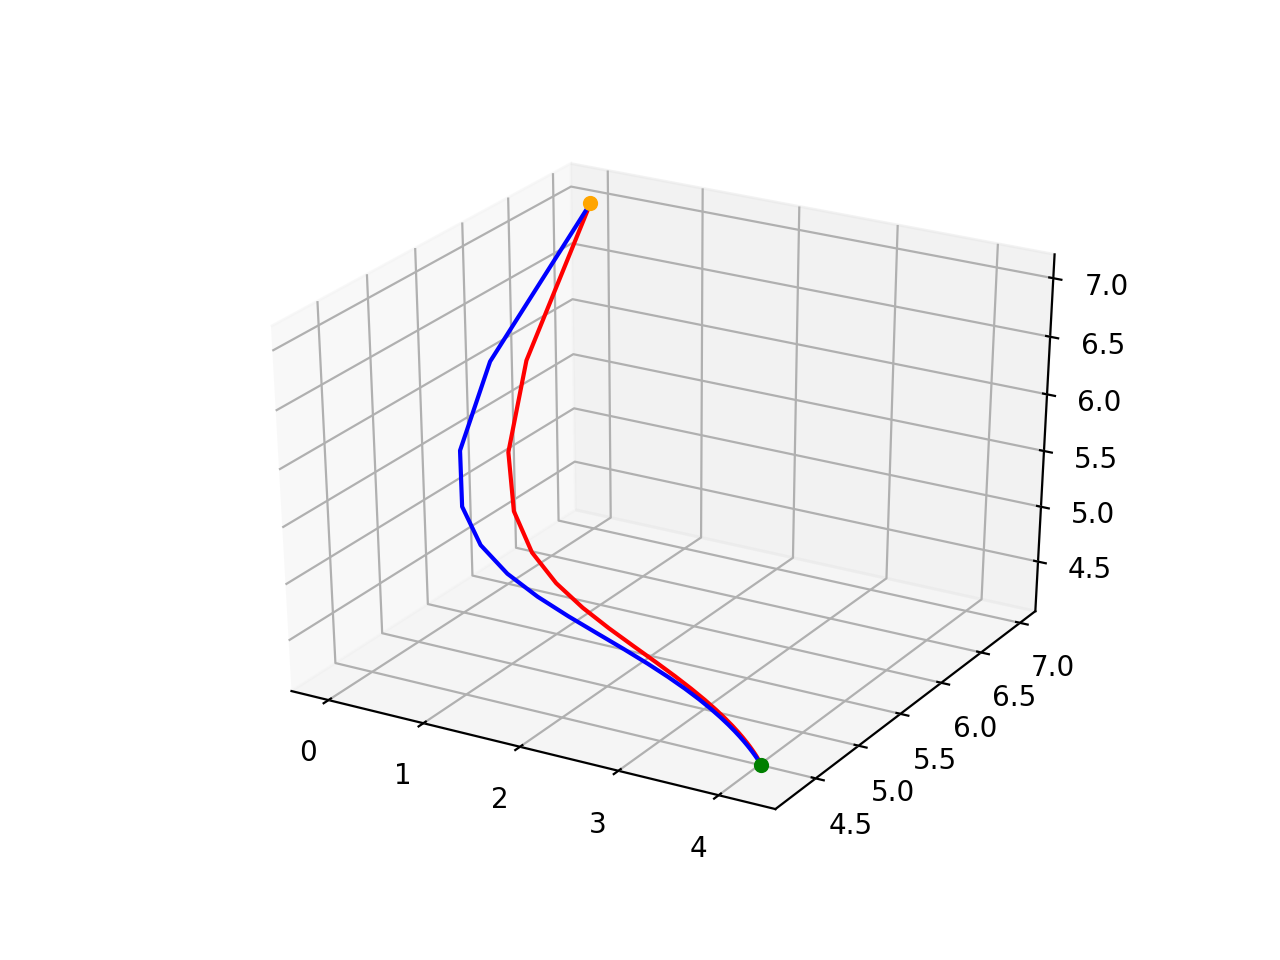

[4.242636203765869, 4.242642879486084, 4.242642879486084]
[4.242639541625977, 4.242641448974609, 4.242641448974609]


In [41]:
%matplotlib notebook

#==========================================================================

def player_payoffs2(quantity_list,
                   market_demand=lambda q: 100 - q,
                   marginal_cost=lambda q: q * 10):
    quantity_tensor = players = torch.stack(quantity_list)

    price = torch.max(
        market_demand(torch.sum(torch.pow(quantity_tensor, 2))),
        torch.tensor(0., requires_grad=True)
    )

    payoffs = []
    for i, quantity in enumerate(quantity_tensor):
        # Negative, since CGD minimizes player objectives.
        payoffs.append(- (quantity * price - marginal_cost(quantity)))
        
    return payoffs
#==========================================================================

num_iterations = 100
learning_rates = [0.01, 0.01, 0.01]

#==========================================================================

# Define individual sellers quantities
p1 = torch.tensor([0.], requires_grad=True)
p2 = torch.tensor([7.], requires_grad=True)
p3 = torch.tensor([7.], requires_grad=True)

player_list = [p1, p2, p3]

cgd_trajectory = [[], [], []]

for i in range(num_iterations):
    
    for player, traj_list in zip(player_list, cgd_trajectory):
        traj_list.append(float(player[0]))
    
    payoffs = player_payoffs2(player_list)
    updates, _ = cgd_utils.metamatrix_conjugate_gradient(
        payoffs, player_list, lr_list=learning_rates)
    
    for player, update in zip(player_list, updates):
        player.data.add_(update)

#==========================================================================

# Define individual sellers quantities
p1 = torch.tensor([0.], requires_grad=True)
p2 = torch.tensor([7.], requires_grad=True)
p3 = torch.tensor([7.], requires_grad=True)

player_list = [p1, p2, p3]

gda_trajectory = [[], [], []]

for i in range(num_iterations):
    
    for player, traj_list in zip(player_list, gda_trajectory):
        traj_list.append(float(player[0]))
    
    for i, player in enumerate(player_list):
        payoffs = player_payoffs2(player_list)
        
        update = gda_utils.compute_update(payoffs[i], player, lr=learning_rates[i])
        player.data.add_(update)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(*cgd_trajectory, 'red')
ax.plot3D(*gda_trajectory, 'blue')
ax.scatter3D([4.2426], [4.2426], [4.2426], c=['Green']);
ax.scatter3D([0], [7], [7], c=['Orange']);

#==========================================================================

print([coord[-1] for coord in cgd_trajectory])
print([coord[-1] for coord in gda_trajectory])


<IPython.core.display.Javascript object>


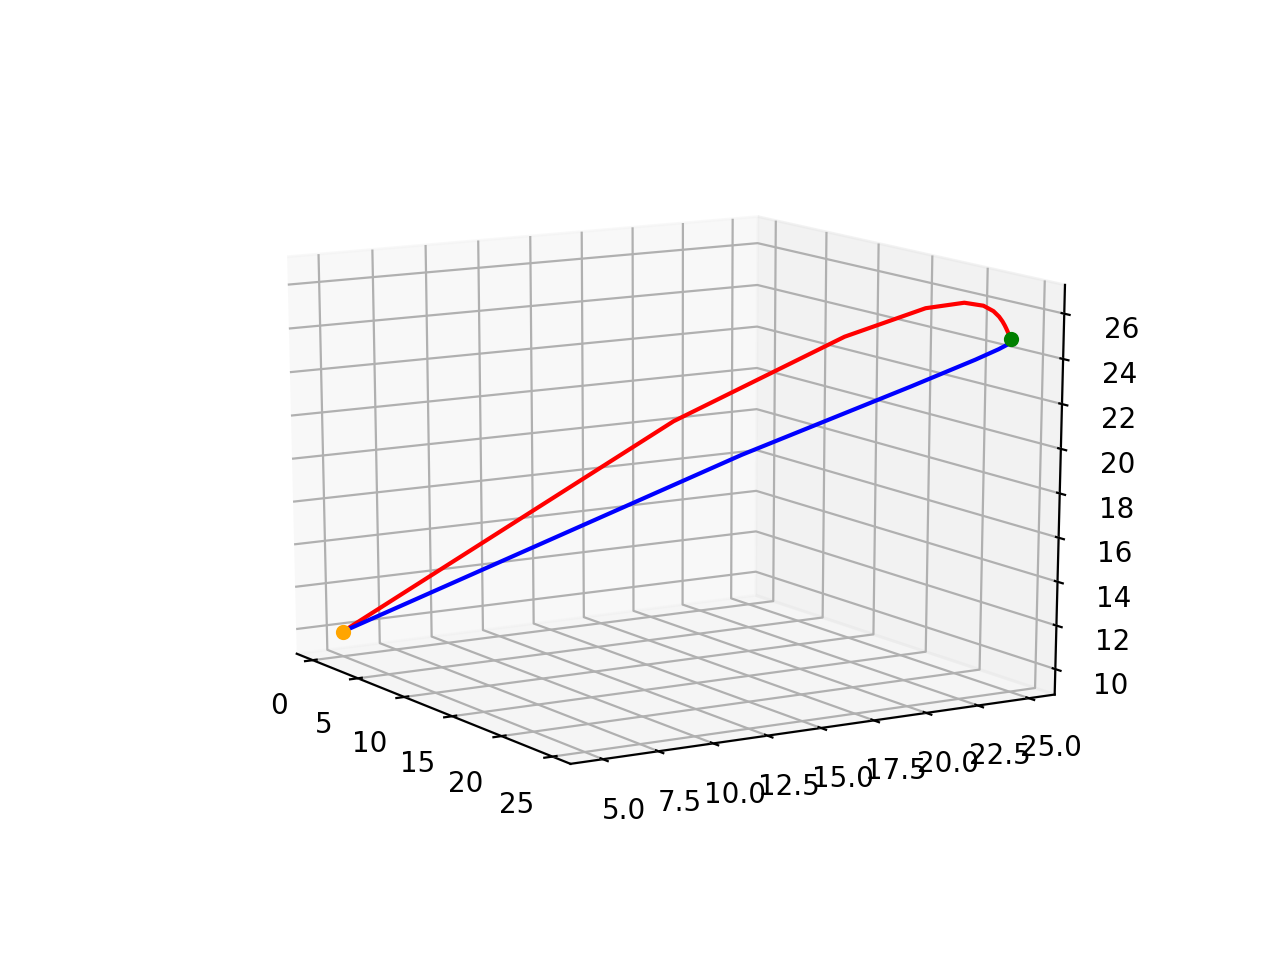

[24.793485641479492, 24.793489456176758, 24.79349136352539]
[24.793487548828125, 24.79349136352539, 24.793487548828125]


In [43]:
%matplotlib notebook

#==========================================================================

def player_payoffs3(quantity_list,
                   market_demand=lambda q: 100 - q,
                   marginal_cost=lambda q: 100 * q / (q + 10)):
    quantity_tensor = players = torch.stack(quantity_list)

    price = torch.max(
        market_demand(torch.sum(quantity_tensor)),
        torch.tensor(0., requires_grad=True)
    )

    payoffs = []
    for i, quantity in enumerate(quantity_tensor):
        # Negative, since CGD minimizes player objectives.
        payoffs.append(- (quantity * price - marginal_cost(quantity)))
        
    return payoffs

#==========================================================================

num_iterations = 100
learning_rates = [0.2, 0.2, 0.2]

#==========================================================================

# Define individual sellers quantities
p1 = torch.tensor([0.], requires_grad=True)
p2 = torch.tensor([5.], requires_grad=True)
p3 = torch.tensor([10.], requires_grad=True)

player_list = [p1, p2, p3]

cgd_trajectory = [[], [], []]

for i in range(num_iterations):
    
    for player, traj_list in zip(player_list, cgd_trajectory):
        traj_list.append(float(player[0]))
    
    payoffs = player_payoffs3(player_list)
    updates, _ = cgd_utils.metamatrix_conjugate_gradient(
        payoffs, player_list, lr_list=learning_rates)
    
    for player, update in zip(player_list, updates):
        player.data.add_(update)

#==========================================================================

# Define individual sellers quantities
p1 = torch.tensor([0.], requires_grad=True)
p2 = torch.tensor([5.], requires_grad=True)
p3 = torch.tensor([10.], requires_grad=True)

player_list = [p1, p2, p3]

gda_trajectory = [[], [], []]

for i in range(num_iterations):
    
    for player, traj_list in zip(player_list, gda_trajectory):
        traj_list.append(float(player[0]))
    
    for i, player in enumerate(player_list):
        payoffs = player_payoffs3(player_list)
        
        update = gda_utils.compute_update(payoffs[i], player, lr=learning_rates[i])
        player.data.add_(update)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(*cgd_trajectory, 'red')
ax.plot3D(*gda_trajectory, 'blue')
ax.scatter3D([24.793], [24.793], [24.793], c=['Green']);
ax.scatter3D([0], [5], [10], c=['Orange']);

#==========================================================================

print([coord[-1] for coord in cgd_trajectory])
print([coord[-1] for coord in gda_trajectory])
